### Data Preprocessing

### Prediction

### Classification

In [2]:
Heart_disease_best_results = {
    "RF": {
        "model": "Baseline",
        "accuracy": 0.903657,
        "precision": 0.338959,
        "recall": 0.132055,
        "f1_score": 0.190063
    },
    "SVM": {
        "model": "Tuned",
        "accuracy": 0.906925,
        "precision": 0.352651,
        "recall": 0.104475,
        "f1_score": 0.161195
    },
    "Naive Bayes": {
        "model": "Baseline",
        "accuracy": 0.848872,
        "precision": 0.267193,
        "recall": 0.439269,
        "f1_score": 0.332274
    },
    "MLP": {
        "model": "Baseline",
        "accuracy": 0.915555,
        "precision": 0.537602,
        "recall": 0.096621,
        "f1_score": 0.163802
    }
}

SkinCancer_best_results = {
    "RF": {
        "model": "Tuned",
        "accuracy": 0.923310,
        "precision": 0.624384,
        "recall": 0.428571,
        "f1_score": 0.508271
    },
    "SVM": {
        "model": "Tuned",
        "accuracy": 0.918245,
        "precision": 0.574339,
        "recall": 0.448014,
        "f1_score": 0.503372
    },
    "Naive Bayes": {
        "model": "Baseline",
        "accuracy": 0.830219,
        "precision": 0.332293,
        "recall": 0.828064,
        "f1_score": 0.474268
    },
    "MLP": {
        "model": "Fast",
        "accuracy": 0.924545,
        "precision": 0.603066,
        "recall": 0.538631,
        "f1_score": 0.569030
    }
}

Asthma_best_results = {
    "RF": {
        "model": "Tuned",
        "accuracy": 0.903141,
        "precision": 0.702698,
        "recall": 0.512281,
        "f1_score": 0.592568
    },
    "SVM": {
        "model": "Baseline",
        "accuracy": 0.902672,
        "precision": 0.724917,
        "recall": 0.470776,
        "f1_score": 0.570838
    },
    "Naive Bayes": {
        "model": "Baseline",
        "accuracy": 0.830751,
        "precision": 0.376234,
        "recall": 0.351035,
        "f1_score": 0.363198
    },
    "MLP": {
        "model": "Baseline",
        "accuracy": 0.904564,
        "precision": 0.685313,
        "recall": 0.565613,
        "f1_score": 0.619736
    }
}

import pickle as pkl

with open('best_results_classification.pkl', 'wb') as f:
    pkl.dump({
        'Heart Disease': Heart_disease_best_results,
        'Skin Cancer': SkinCancer_best_results,
        'Asthma': Asthma_best_results
    }, f)

In [3]:
import pickle as pkl

with open('best_results_classification.pkl', 'rb') as f:
    best_results = pkl.load(f)

import matplotlib.pyplot as plt

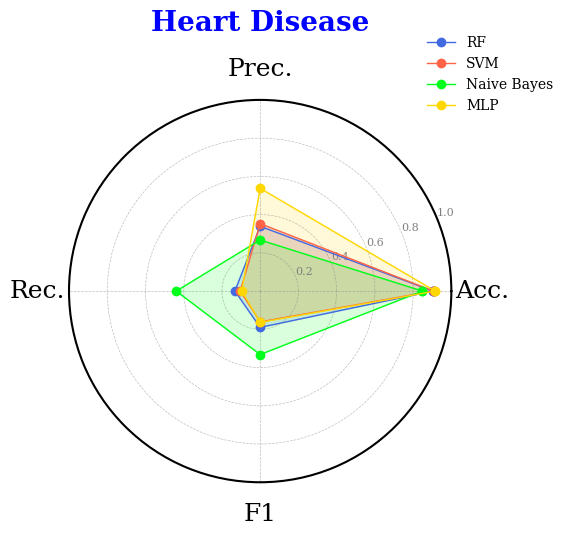

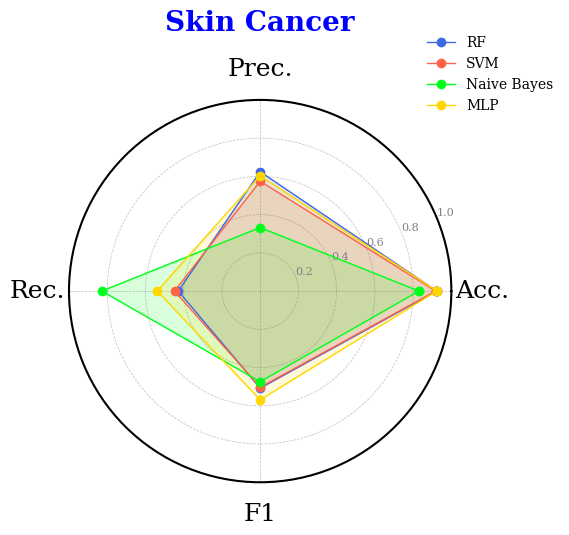

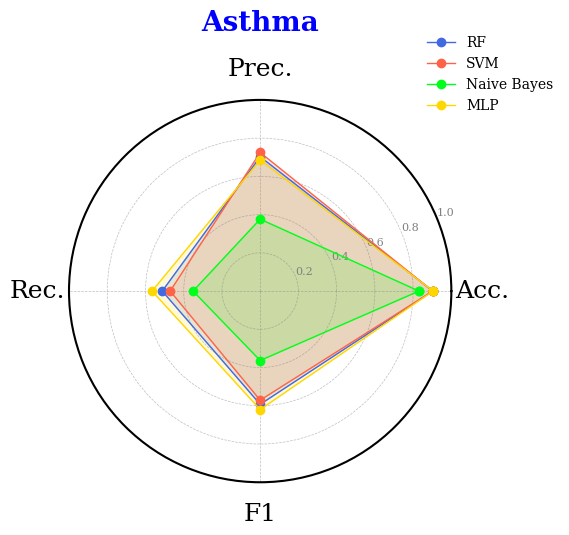

In [62]:
import numpy as np

# Function to plot a radar chart for one dataset
def plot_radar_for_dataset(name, results):
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    labels = ['Acc.', 'Prec.', 'Rec.', 'F1']
    N = len(labels)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    # close the plot
    angles += angles[:1]

    plt.figure(figsize=(6,6), facecolor='white')
    ax = plt.subplot(111, polar=True)
    ax.set_facecolor('white')

    # Define colors for each model
    colors = ['#4169E1', '#FF6347', "#00FF1A", '#FFD700']
    
    for idx, (model_name, vals) in enumerate(results.items()):
        values = [vals[m] for m in metrics]
        values += values[:1]
        color = colors[idx % len(colors)]
        ax.plot(angles, values, 'o-', linewidth=1, label=model_name, color=color, markersize=6)
        ax.fill(angles, values, alpha=0.15, color=color)

    # set the labels for each axis
    ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=18)
    ax.tick_params(pad=12)
    
    ax.set_title(name, fontsize=20, fontweight='bold', color='blue', pad=50)
    ax.set_ylim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=8, color='gray')
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
    ax.spines['polar'].set_linewidth(1.5)
    ax.spines['polar'].set_color('black')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.2), frameon=False)
    plt.tight_layout()
    plt.show()

# Plot radar charts for each dataset in the loaded `best_results` dictionary
for dataset_name, dataset_results in best_results.items():
    plot_radar_for_dataset(dataset_name, dataset_results)

### Clustering